## 畫出所有的顏色排列組合

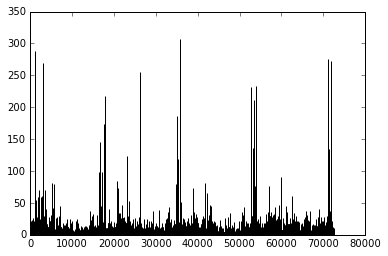

In [2]:
%matplotlib inline
import PIL
from PIL import Image
from matplotlib import pyplot as plt


#讀取每個pixel的color值
im = Image.open('010.jpg')  
w, h = im.size  
colors = im.getcolors(w*h)   #出來的值是 (數量，(R,G,B))


#轉hex碼
def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

#畫圖----沒有照顏色排列
for idx, c in enumerate(colors):
    plt.bar(idx, c[0], color=hexencode(c[1]))

plt.show()

## 將顏色分成64種

In [4]:
%matplotlib inline
import PIL
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np


#顏色降維
im = Image.open('010.jpg')  
w, h = im.size  
colors = im.getcolors(w*h)


rgb_list = np.zeros((4,4,4), dtype=int)

for i in colors:
    count = i[0]
    r,g,b = i[1][0]/64, i[1][1]/64, i[1][2]/64
    for rc in range(4):
        for gc in range(4):
            for bc in range(4):
                if r == rc and g == gc and b == bc:
                    rgb_list[rc][gc][bc] += count
    ###要加條件，黑、白、灰
print rgb_list

[[[27531  1812   322     0]
  [  450  2126   312     0]
  [    0  1812     0     0]
  [    0     0     0     0]]

 [[11308   710     0     0]
  [ 3362 10922  1697     0]
  [    3  8219  2491     0]
  [    0     0     0     0]]

 [[ 8261   242     0     0]
  [ 2450  3897  2158     0]
  [  206  4527 25833 11371]
  [    1    11   433  3988]]

 [[  296    22     0     0]
  [   70    23     0     0]
  [  263  6371 12310   243]
  [    0  1246   263  2990]]]


## 降維、算顏色、畫直方圖

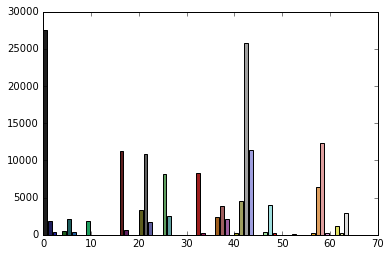

In [5]:
v_rgb_list = rgb_list.reshape(1,64).squeeze()  #降維  三維->一維
r, g, b = 0, 0, 0

for idx, c in enumerate(v_rgb_list):
    bar_c = [(r*64)+30, (g*64)+30, (b*64)+30] #這裡顏色比例還要再調整
    plt.bar(idx, c, color=hexencode(bar_c)) 
    
    #給定條件式，利用餘數來分辨RGB
    b += 1
    if (idx+1) % 4 == 0:
        b = 0
        g += 1
    if (idx+1) % 16 == 0:
        g = 0
        r += 1
plt.show()